## Used Functions

In [1]:
from libtools import *
%matplotlib inline

## Loading data test

In [2]:
training_data = pd.read_csv('facies_vectors.csv')
training_data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,NaN,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,NaN,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,NaN,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


## Create string label to facies

The nine discrete facies (classes of rocks) are: 
1. Nonmarine sandstone
2. Nonmarine coarse siltstone 
3. Nonmarine fine siltstone 
4. Marine siltstone and shale 
5. Mudstone (limestone)
6. Wackestone (limestone)
7. Dolomite
8. Packstone-grainstone (limestone)
9. Phylloid-algal bafflestone (limestone)

Facies |Label| Adjacent Facies | Facies
:---: | :---: |:--:
1 |SS| 2 | Nonmarine sandstone
2 |CSiS| 1,3 | Nonmarine coarse siltstone  
3 |FSiS| 2 | Nonmarine fine siltstone
4 |SiSh| 5 | Marine siltstone and shale
5 |MS| 4,6 | Mudstone (limestone)
6 |WS| 5,7 | Wackestone (limestone)
7 |D| 6,8 | Dolomite
8 |PS| 6,7,9 | Packstone-grainstone (limestone)
9 |BS| 7,8 | Phylloid-algal bafflestone (limestone)

### Facies colors and facies labels equals to facies_classification notebook

In [3]:
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']

#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

In [4]:
training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)
training_data['FaciesLabels2'] = training_data.Facies.apply(litologia)

In [5]:
training_data.head() #Displaying the DataFrame with FaciesLabels

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels,FaciesLabels2
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,FSiS,Nonmarine fine siltstone
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,FSiS,Nonmarine fine siltstone
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,FSiS,Nonmarine fine siltstone
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,FSiS,Nonmarine fine siltstone
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,FSiS,Nonmarine fine siltstone


In [6]:
well_names = training_data['Well Name'].unique()
well_names

array(['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A',
       'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY', 'CHURCHMAN BIBLE'], dtype=object)

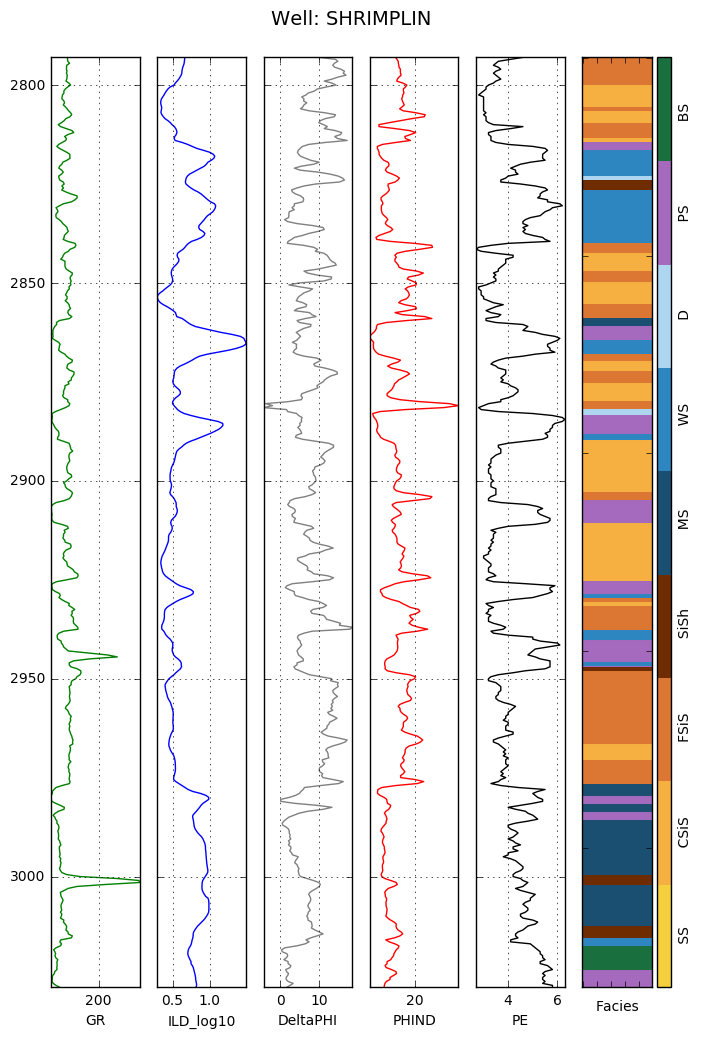

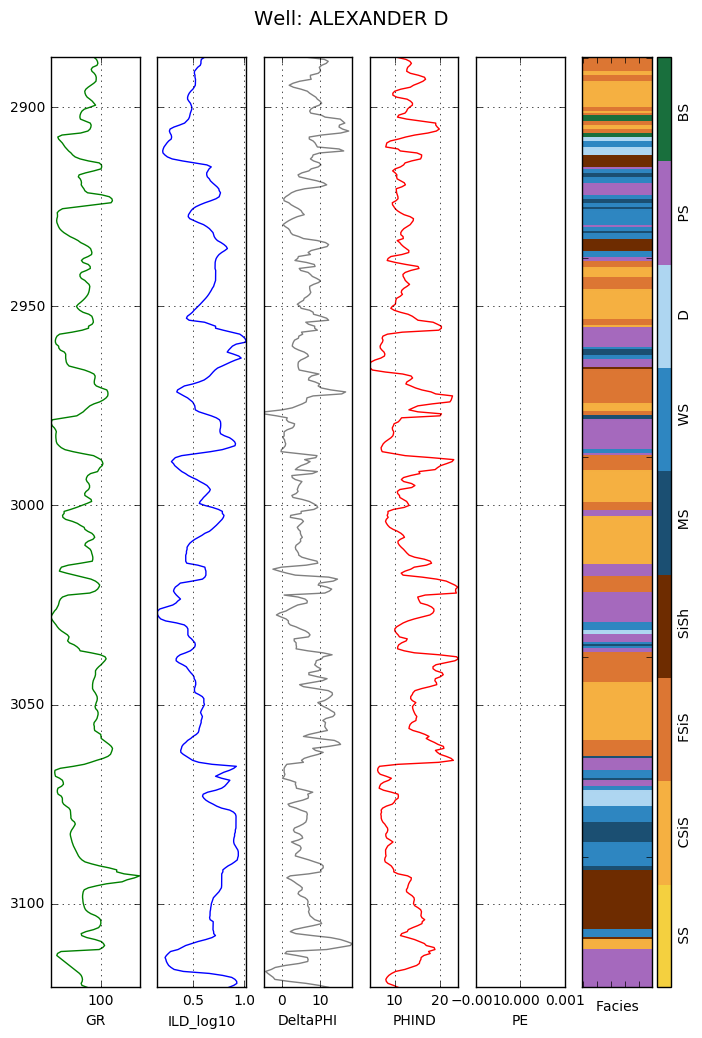

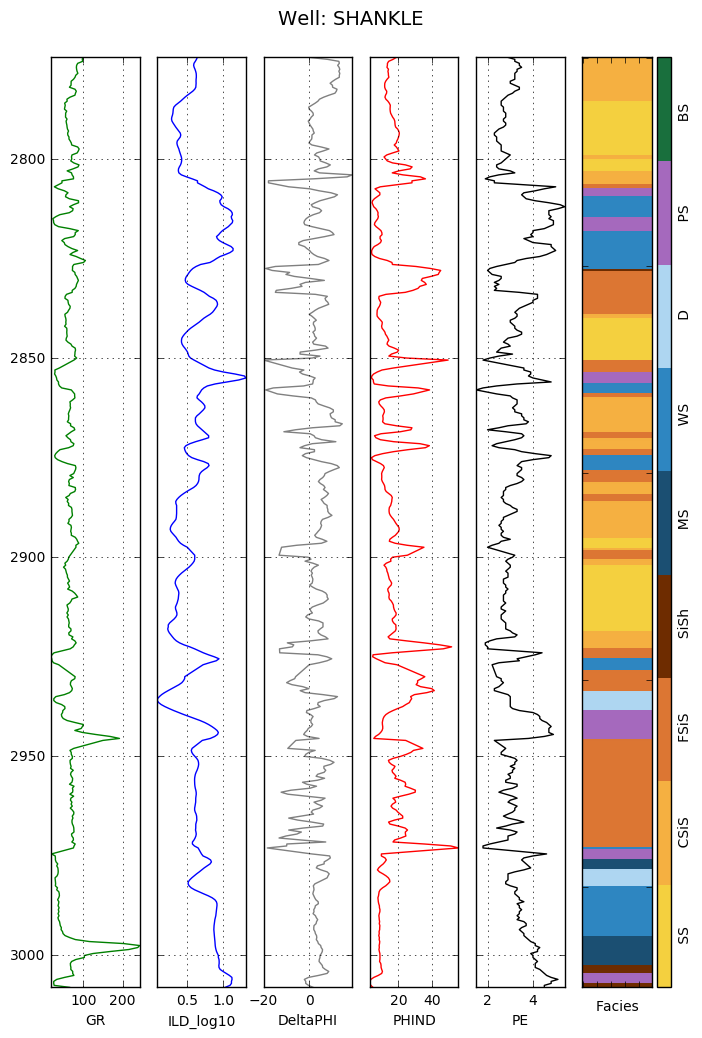

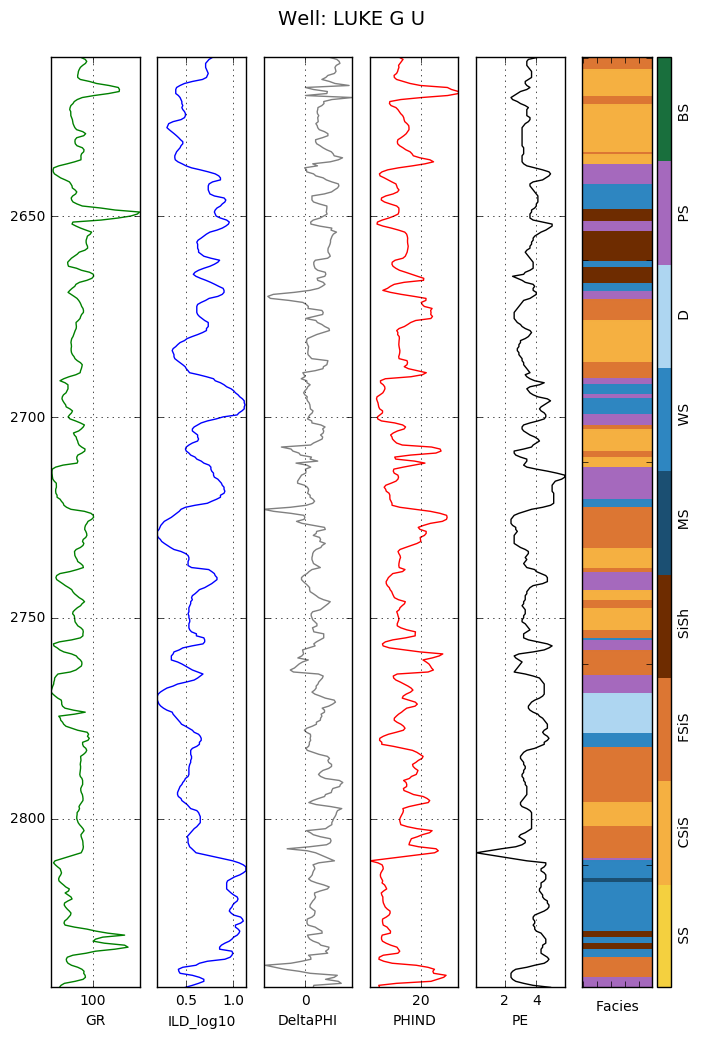

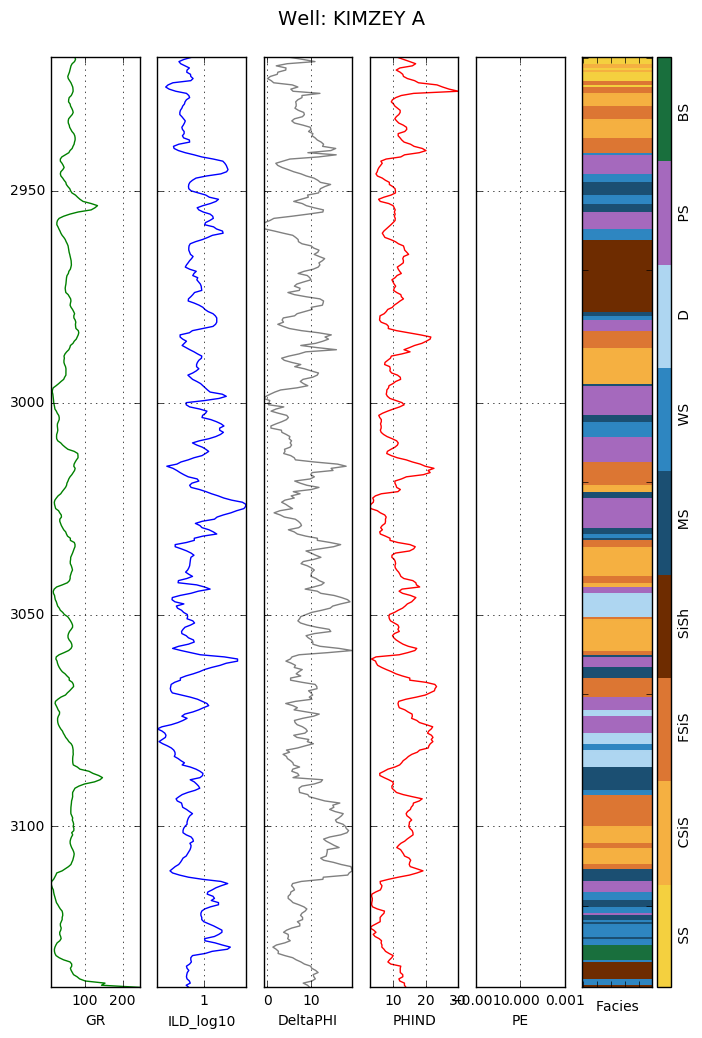

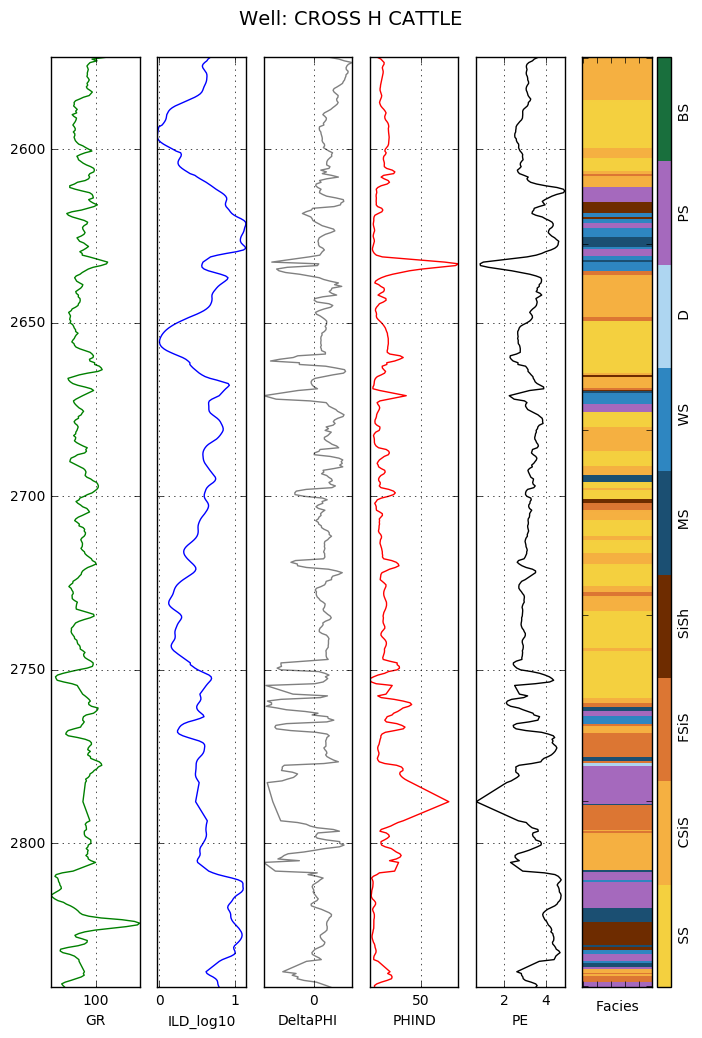

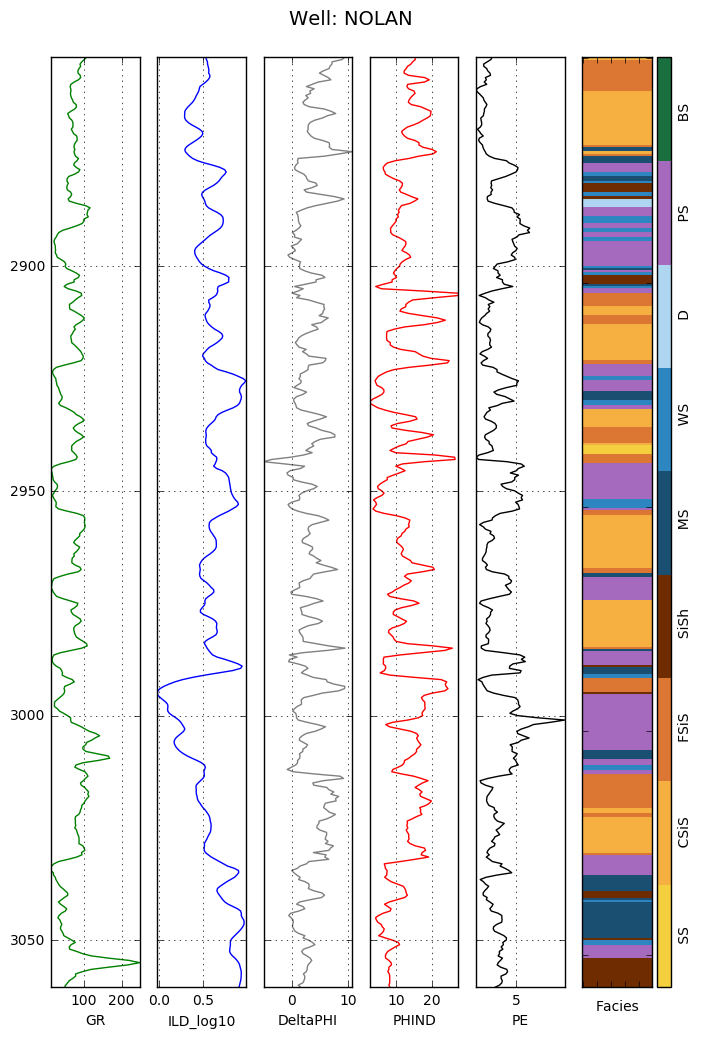

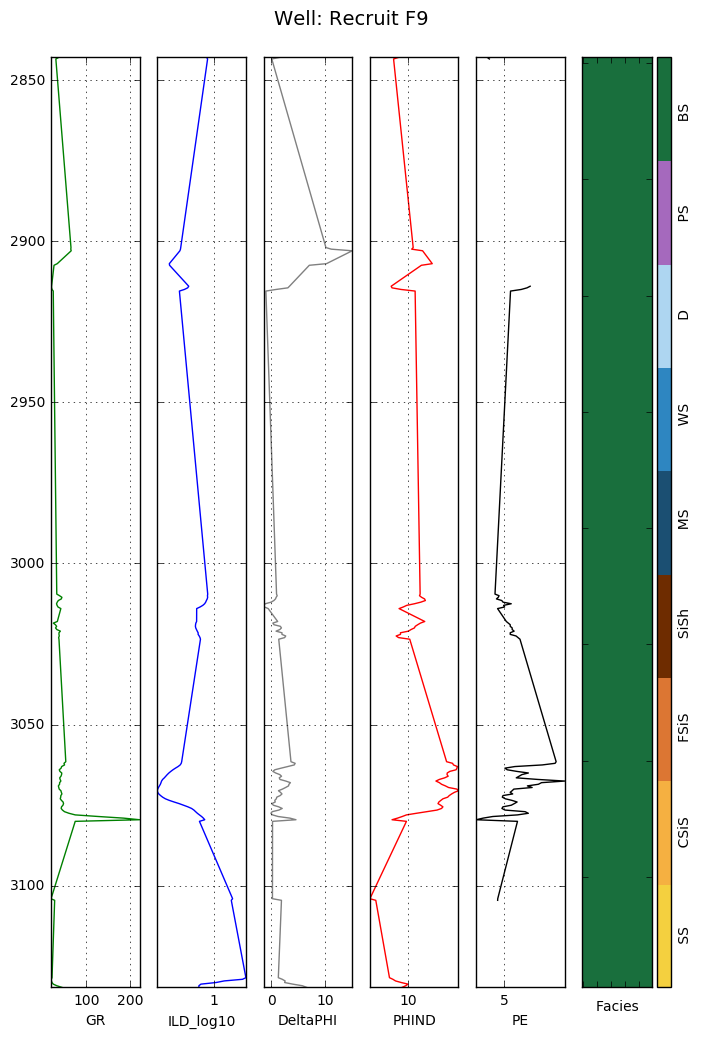

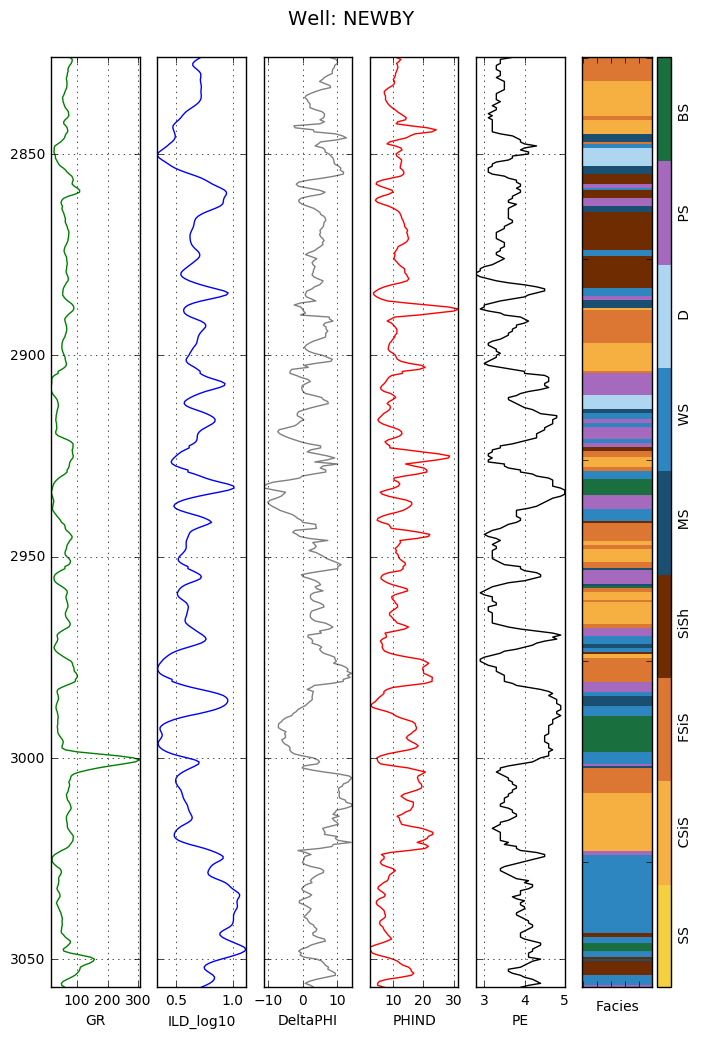

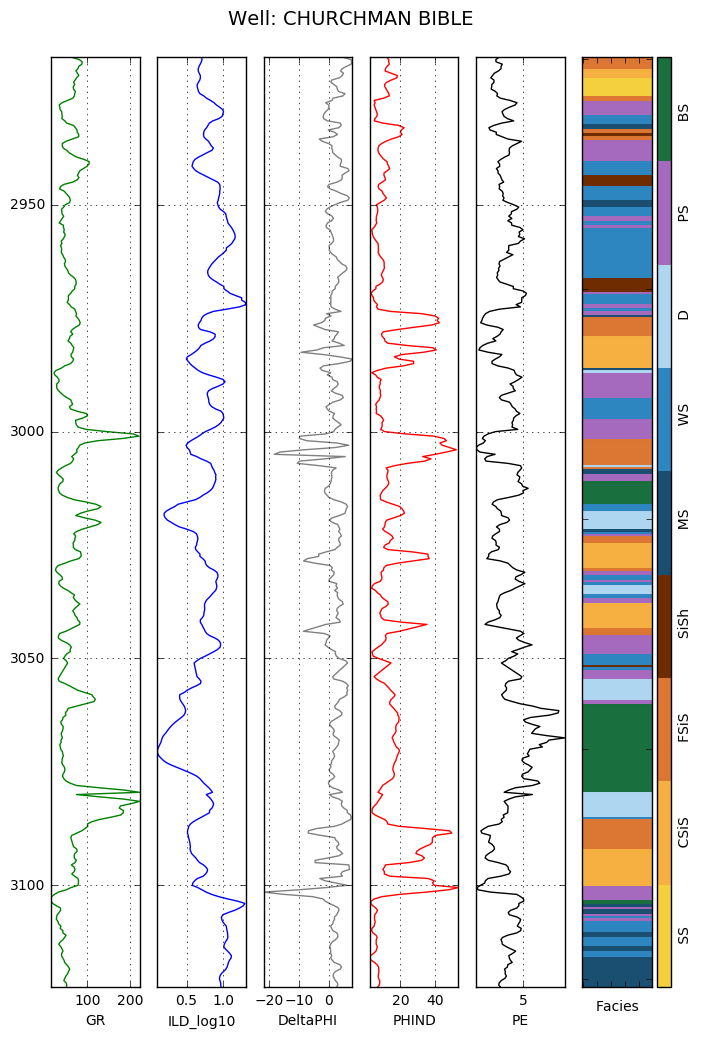

In [7]:
well_names = training_data['Well Name'].unique()

# Plotting all logs contain in this DataFrame
for i in well_names:
    make_facies_log_plot(training_data[training_data['Well Name'] == i], facies_colors)

## Data analysis

In [8]:
import seaborn as sns

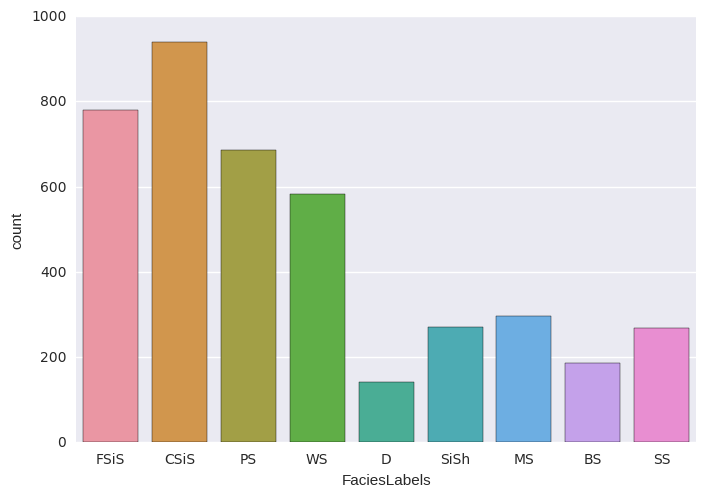

In [9]:
sns.countplot(training_data.FaciesLabels)

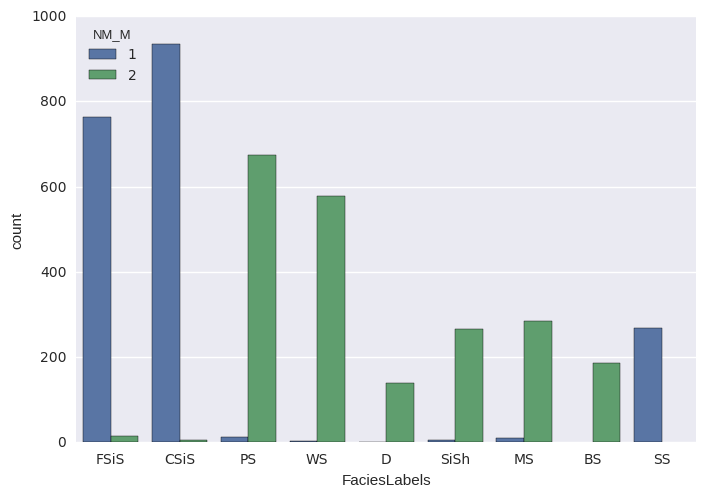

In [10]:
sns.countplot(training_data.FaciesLabels, hue=training_data.NM_M)

#### This graph can show that the mainly No-marine facies are: 

- No-marine fine Siltstone (FSiS)
- No-marine coursen Siltstone (CSiS)
- Sandstone (SS)

#### and marine facies are:

- Packstone-grainstone (PS)
- Wackestone (WS)
- Dolomite (D)
- Marine siltstone and shale (SiSh)
- Phylloid-algal bafflestone (BS)

### We can obtain $\phi_{N}$ (Neutronic porosity) and $\phi_{D}$ (Density porosity) from $DeltaPHI$ and $PHIND$

$$ DeltaPHI = \phi_{N}-\phi_{D} $$

$$ PHIND = \frac{\phi_{N}+\phi_{D}}{2} $$

$$ \phi_{N} = \frac{DeltaPHI + 2 \times PHIND}{2} $$

$$ \phi_{D} = \frac{-DeltaPHi +2 \times PHIND}{2} $$

In [11]:
training_data['PhiN'] = training_data.apply(phi_n, axis=1)
training_data['PhiD'] = training_data.apply(phi_d, axis=1)
training_data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels,FaciesLabels2,PhiN,PhiD
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,FSiS,Nonmarine fine siltstone,16.865,6.965
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,FSiS,Nonmarine fine siltstone,19.665,5.465
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,FSiS,Nonmarine fine siltstone,20.450,5.650
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,FSiS,Nonmarine fine siltstone,20.065,6.165
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,FSiS,Nonmarine fine siltstone,20.050,6.550


### Now, we can make new analysis about HC and shale influence

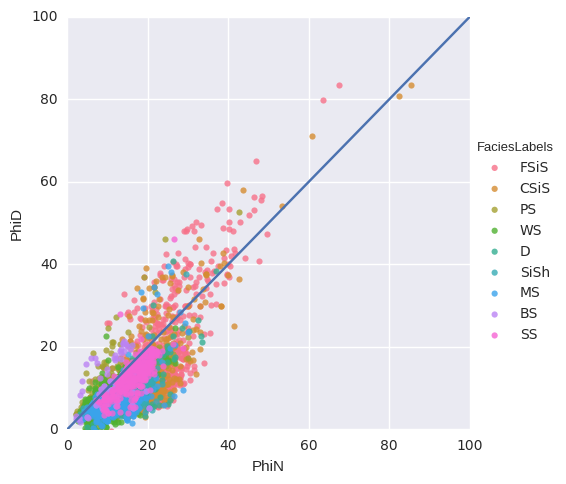

In [12]:
sns.lmplot('PhiN','PhiD',data=training_data,fit_reg=False,hue='FaciesLabels')
plt.xlim(0,100)
plt.ylim(0,100)
x=[0,100]
y=[0,100]
plt.plot(x,y)

### Counting how many facies have $\phi_{D} > \phi_{N}$

In [13]:
HC_training_data = training_data[training_data.PhiD > training_data.PhiN]
HC_training_data['FaciesLabels2'].value_counts()

Nonmarine fine siltstone                  164
Packstone-grainstone (limestone)          139
Wackestone (limestone)                     66
Nonmarine coarse siltstone                 62
Phylloid-algal bafflestone (limestone)     41
Mudstone (limestone)                       16
Nonmarine sandstone                        14
Dolomite                                    5
Marine siltstone and shale                  3
Name: FaciesLabels2, dtype: int64

In [14]:
HC_training_data['FaciesLabels2'].value_counts()/training_data.shape[0] *100 #Percentual of each facies

Nonmarine fine siltstone                  3.952760
Packstone-grainstone (limestone)          3.350205
Wackestone (limestone)                    1.590745
Nonmarine coarse siltstone                1.494336
Phylloid-algal bafflestone (limestone)    0.988190
Mudstone (limestone)                      0.385635
Nonmarine sandstone                       0.337431
Dolomite                                  0.120511
Marine siltstone and shale                0.072307
Name: FaciesLabels2, dtype: float64

In [15]:
auxiliar = HC_training_data['FaciesLabels'].value_counts()/training_data.shape[0] *100
print('%.2f in percent' % auxiliar.sum()) #Total percentual of HC_training_data in training_data

12.29 in percent


### Verifying the mean, median and max values of $\phi_{N}$ and $\phi_{D}$

In [16]:
df_litology = training_data.groupby(training_data.FaciesLabels2)

In [17]:
df_litology['PhiN','PhiD'].mean()

,PhiN,PhiD
FaciesLabels2,,
Dolomite,17.109840,10.938394
Marine siltstone and shale,14.869557,8.370100
Mudstone (limestone),11.767090,7.028454
Nonmarine coarse siltstone,17.717266,11.671448
Nonmarine fine siltstone,22.432686,17.280750
Nonmarine sandstone,16.566369,13.028728
Packstone-grainstone (limestone),10.891427,8.739585
Phylloid-algal bafflestone (limestone),13.315627,12.291043
Wackestone (limestone),9.368653,6.075933


In [18]:
df_litology['PhiN','PhiD'].median()

,PhiN,PhiD
FaciesLabels2,,
Dolomite,16.56200,9.60000
Marine siltstone and shale,15.35000,7.68900
Mudstone (limestone),10.62425,5.75250
Nonmarine coarse siltstone,17.00000,9.40000
Nonmarine fine siltstone,21.62650,13.78625
Nonmarine sandstone,16.80000,12.92500
Packstone-grainstone (limestone),9.87100,7.80000
Phylloid-algal bafflestone (limestone),13.20000,12.40000
Wackestone (limestone),8.90000,5.67250


In [19]:
df_litology['PhiN','PhiD'].max()

,PhiN,PhiD
FaciesLabels2,,
Dolomite,37.0635,40.900
Marine siltstone and shale,29.6000,37.600
Mudstone (limestone),29.8700,39.700
Nonmarine coarse siltstone,85.4000,83.400
Nonmarine fine siltstone,67.5000,83.500
Nonmarine sandstone,28.7200,46.100
Packstone-grainstone (limestone),42.6840,52.758
Phylloid-algal bafflestone (limestone),20.7765,21.300
Wackestone (limestone),26.8450,24.645


In [20]:
df_litology['PhiN','PhiD'].min()

,PhiN,PhiD
FaciesLabels2,,
Dolomite,4.8300,0.4405
Marine siltstone and shale,3.2000,2.8000
Mudstone (limestone),3.0000,-0.5640
Nonmarine coarse siltstone,6.6400,2.6000
Nonmarine fine siltstone,4.9085,-0.7850
Nonmarine sandstone,7.0750,3.5000
Packstone-grainstone (limestone),2.0900,-5.0000
Phylloid-algal bafflestone (limestone),2.1000,1.7000
Wackestone (limestone),2.6495,-0.2340


(-5, 100)

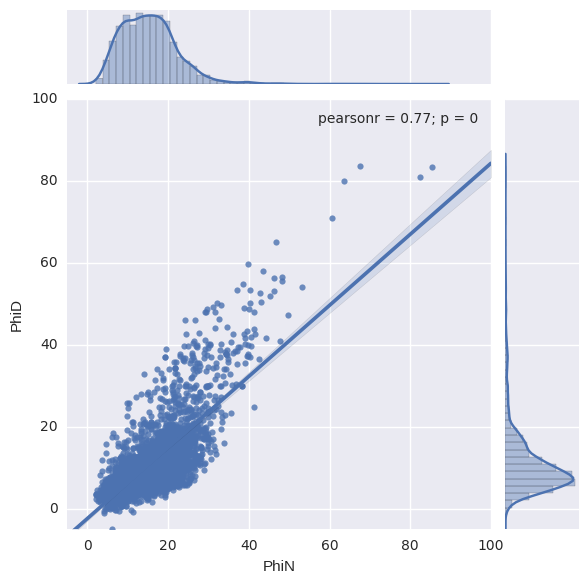

In [21]:
sns.jointplot("PhiN", "PhiD", data=training_data, kind="reg")
plt.xlim(-5,100)
plt.ylim(-5,100)

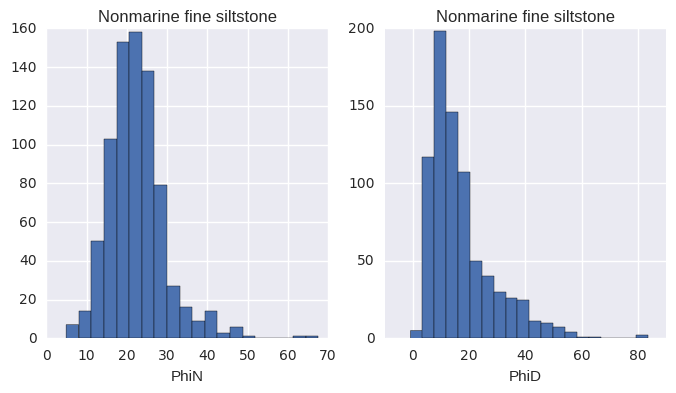

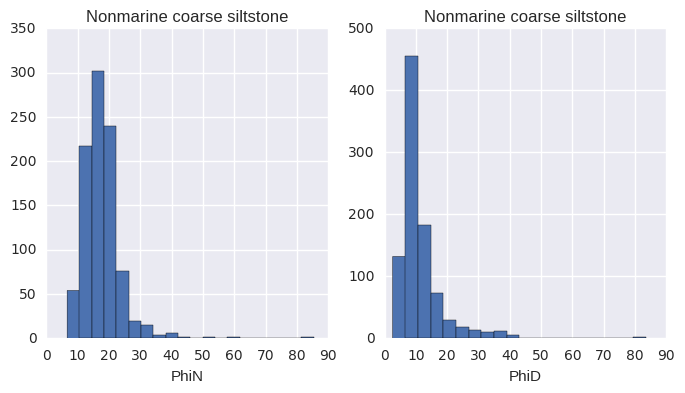

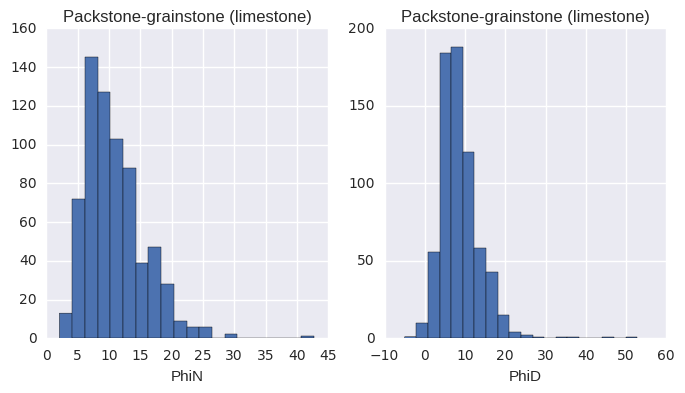

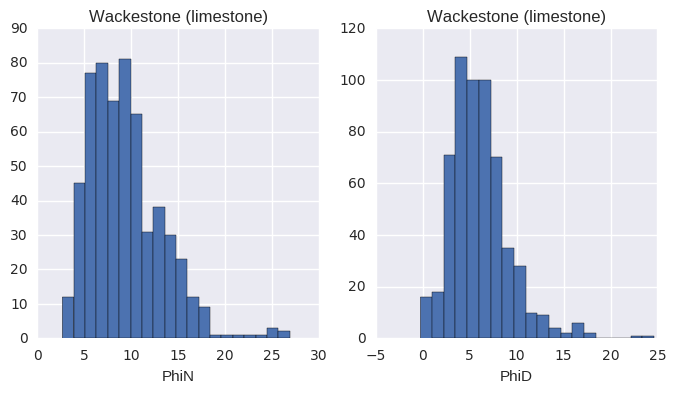

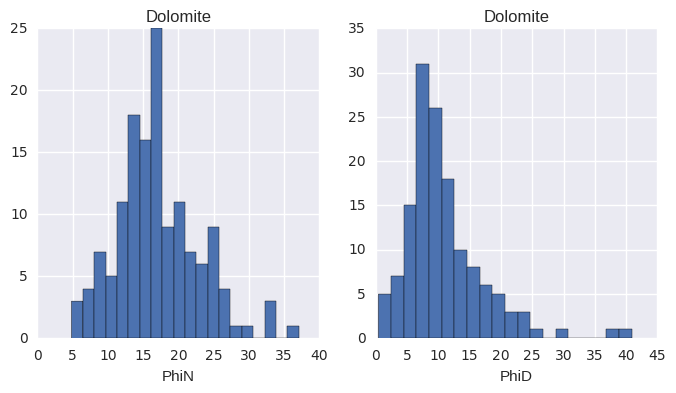

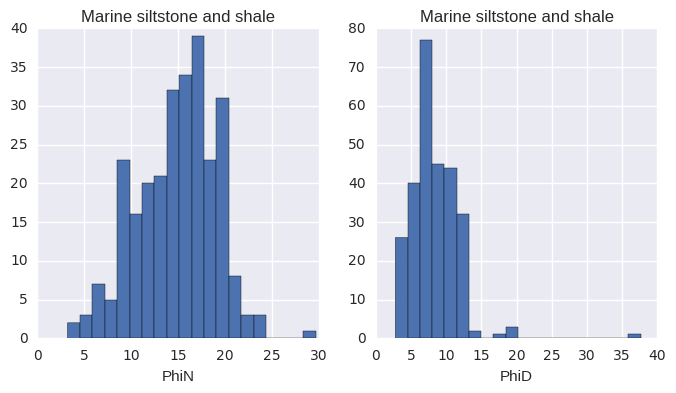

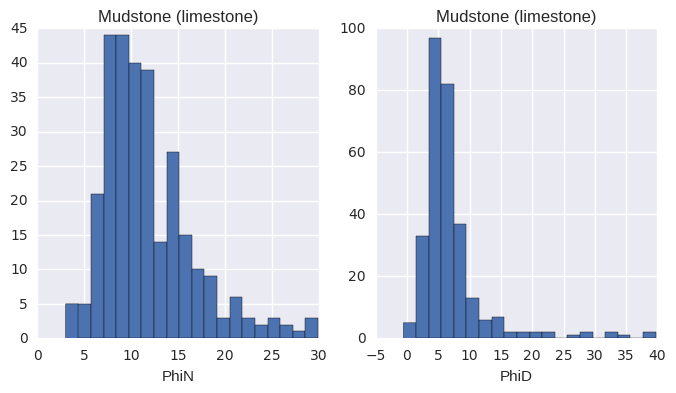

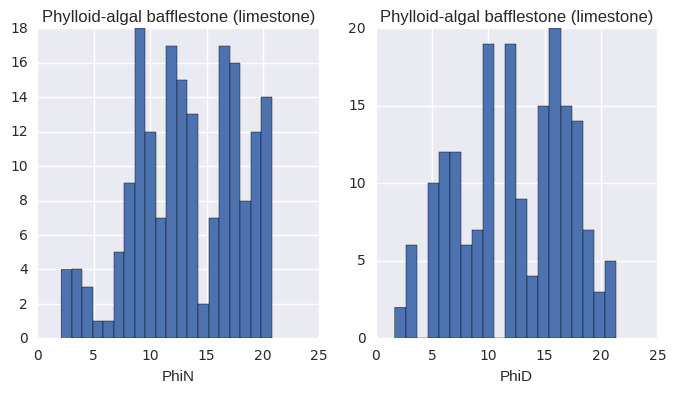

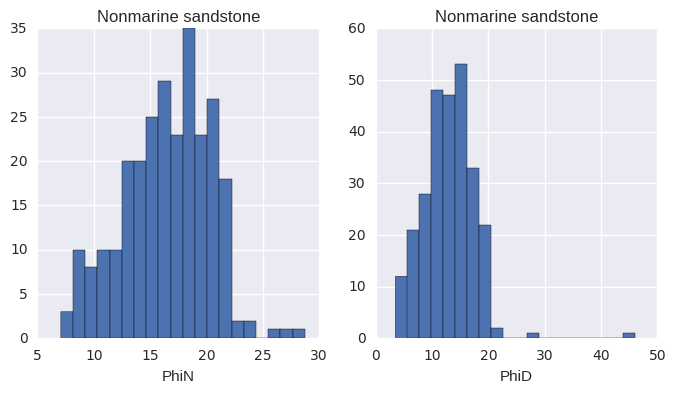

In [22]:
vector_facies = training_data.FaciesLabels2.unique()
for i in vector_facies:
    plt.figure(figsize=(8,4))
    plt.subplot(121)
    plt.title(i)
    plt.xlabel('PhiN')
    plt.hist(training_data[training_data.FaciesLabels2 == i].PhiN, bins=20)
    
    plt.subplot(122)
    plt.title(i)
    plt.xlabel('PhiD')
    plt.hist(training_data[training_data.FaciesLabels2 == i].PhiD, bins=20)
    plt.show()

In [23]:
training_data[(training_data['PhiN'] > 35) | (training_data['PhiD'] > 35) |
             (training_data['PhiN'] < 0) | (training_data['PhiD'] < 0)].Facies.count()

126

## Analysing the values of GR (Gama Ray) 

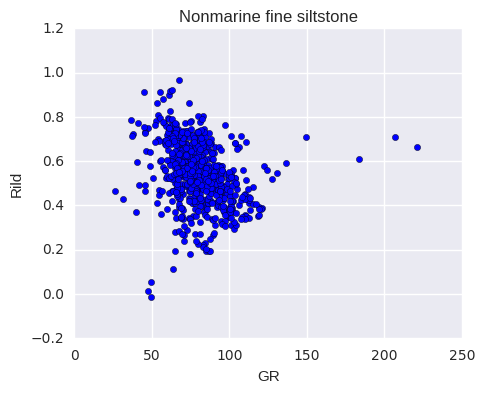

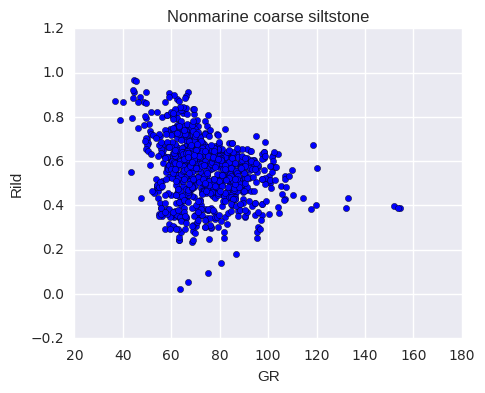

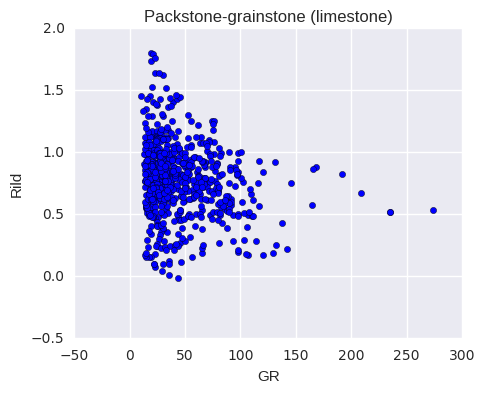

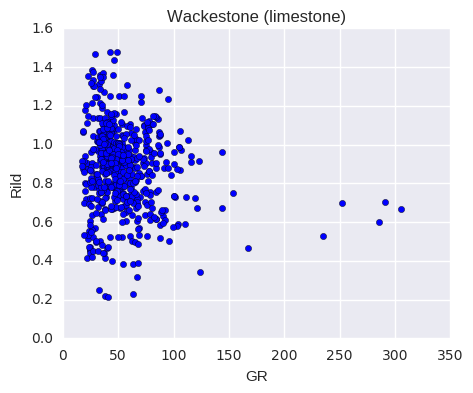

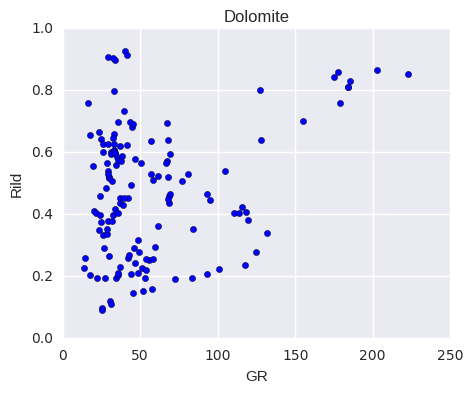

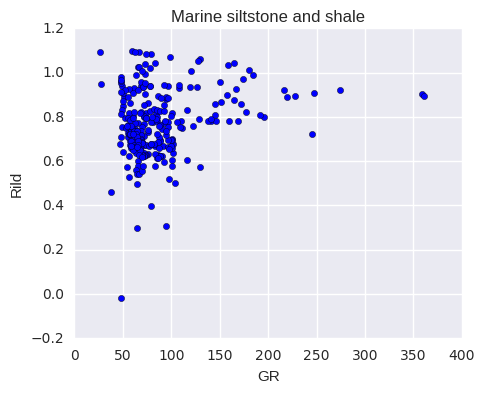

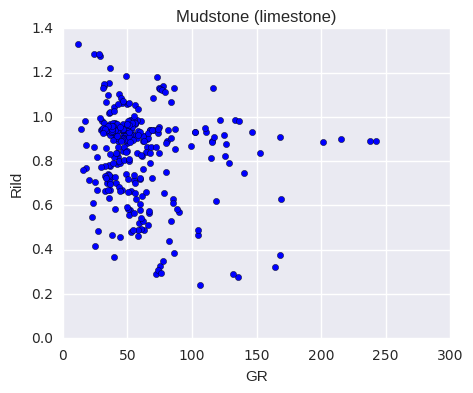

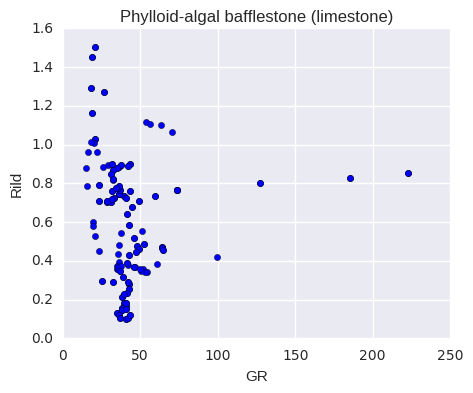

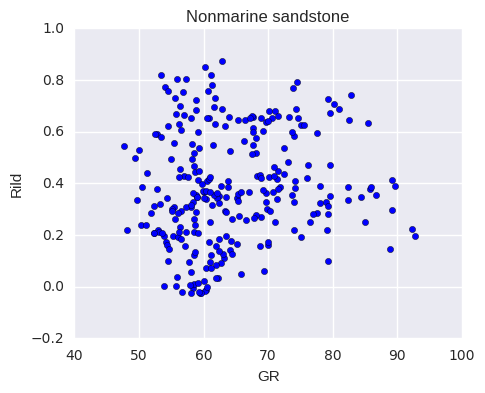

In [24]:
vector_facies = training_data.FaciesLabels2.unique()
for i in vector_facies:
    plt.figure(figsize=(5,4))
    plt.title(i)
    plt.xlabel('GR')
    plt.ylabel('Rild')
    plt.scatter(training_data[training_data.FaciesLabels2 == i].GR,
             training_data[training_data.FaciesLabels2 == i].ILD_log10, marker = 'o')

In [25]:
df_litology.GR.mean()

FaciesLabels2
Dolomite                                  57.595496
Marine siltstone and shale                87.583989
Mudstone (limestone)                      60.408845
Nonmarine coarse siltstone                74.100338
Nonmarine fine siltstone                  79.880272
Nonmarine sandstone                       64.475474
Packstone-grainstone (limestone)          44.767631
Phylloid-algal bafflestone (limestone)    43.681643
Wackestone (limestone)                    54.367357
Name: GR, dtype: float64

In [26]:
df_litology.GR.median()

FaciesLabels2
Dolomite                                  41.1640
Marine siltstone and shale                73.2100
Mudstone (limestone)                      51.0445
Nonmarine coarse siltstone                72.1025
Nonmarine fine siltstone                  78.5100
Nonmarine sandstone                       61.9520
Packstone-grainstone (limestone)          33.6615
Phylloid-algal bafflestone (limestone)    38.2500
Wackestone (limestone)                    47.7100
Name: GR, dtype: float64

In [27]:
df_litology.GR.min()

FaciesLabels2
Dolomite                                  13.530
Marine siltstone and shale                26.220
Mudstone (limestone)                      11.761
Nonmarine coarse siltstone                36.663
Nonmarine fine siltstone                  26.230
Nonmarine sandstone                       47.697
Packstone-grainstone (limestone)          10.149
Phylloid-algal bafflestone (limestone)    14.840
Wackestone (limestone)                    17.090
Name: GR, dtype: float64

In [28]:
df_litology.GR.max()

FaciesLabels2
Dolomite                                  222.500
Marine siltstone and shale                361.150
Mudstone (limestone)                      242.750
Nonmarine coarse siltstone                154.370
Nonmarine fine siltstone                  221.125
Nonmarine sandstone                        92.783
Packstone-grainstone (limestone)          273.480
Phylloid-algal bafflestone (limestone)    222.500
Wackestone (limestone)                    305.870
Name: GR, dtype: float64

In [29]:
training_data[training_data['GR']>175].GR.count()

41

---

In [30]:
training_data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels,FaciesLabels2,PhiN,PhiD
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,FSiS,Nonmarine fine siltstone,16.865,6.965
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,FSiS,Nonmarine fine siltstone,19.665,5.465
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,FSiS,Nonmarine fine siltstone,20.450,5.650
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,FSiS,Nonmarine fine siltstone,20.065,6.165
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,FSiS,Nonmarine fine siltstone,20.050,6.550


## Verifying Formation's properties

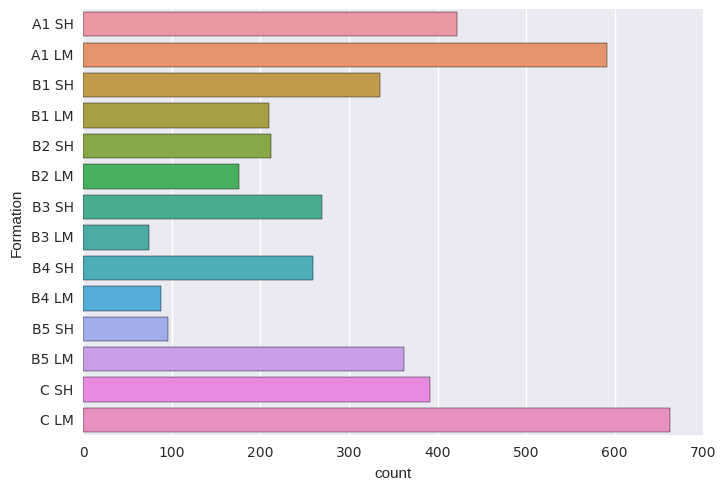

In [31]:
sns.countplot(y=training_data.Formation)

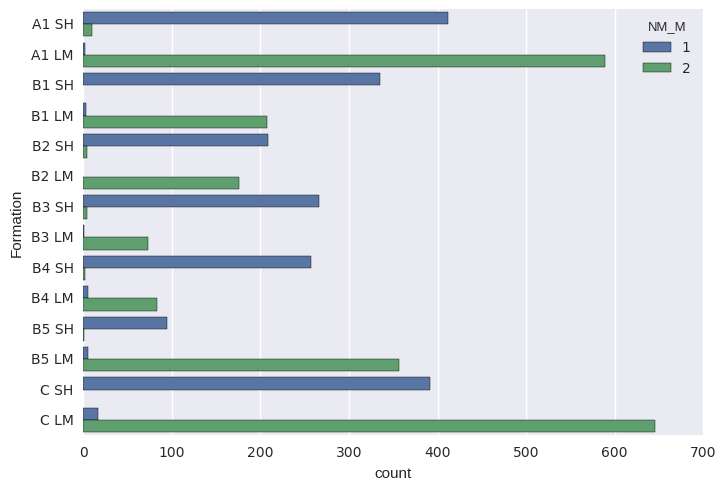

In [32]:
sns.countplot(y=training_data.Formation, hue=training_data.NM_M)

### Creating a new feature with Formation column

In [33]:
formation_array = training_data.Formation.unique()

In [34]:
a = np.asarray(training_data.Formation)
training_data['Label_Form'] = label_formation(a,formation_array)

Numerical Formation | Formation
:---:| :---:
1  | A1 SH
2  | A1 LM
3  | B1 SH
4  | B1 LM
5  | B2 SH
6  | B2 LM
7  | B3 SH
8  | B3 LM
9  | B4 SH
10 | B4 LM
11 | B5 SH
12 | B5 LM
13 | C SH
14 | C LM

In [35]:
training_data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels,FaciesLabels2,PhiN,PhiD,Label_Form
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,FSiS,Nonmarine fine siltstone,16.865,6.965,1
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,FSiS,Nonmarine fine siltstone,19.665,5.465,1
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,FSiS,Nonmarine fine siltstone,20.450,5.650,1
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,FSiS,Nonmarine fine siltstone,20.065,6.165,1
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,FSiS,Nonmarine fine siltstone,20.050,6.550,1


In [36]:
training_data['Label_Form_SH_LM'] = training_data.Formation.apply(label_two_groups_formation)

In [37]:
training_data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels,FaciesLabels2,PhiN,PhiD,Label_Form,Label_Form_SH_LM
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,FSiS,Nonmarine fine siltstone,16.865,6.965,1,1
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,FSiS,Nonmarine fine siltstone,19.665,5.465,1,1
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,FSiS,Nonmarine fine siltstone,20.450,5.650,1,1
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,FSiS,Nonmarine fine siltstone,20.065,6.165,1,1
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,FSiS,Nonmarine fine siltstone,20.050,6.550,1,1


In [38]:
training_data['RELPOS_NM_M'] = NM_M_TOPO(training_data)

In [39]:
training_data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,PhiN,PhiD,Label_Form,Label_Form_SH_LM,RELPOS_NM_M
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852,15.402308,10.999824,7.476982,1.521330,0.500000
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644,7.121038,8.059673,4.819176,0.499605,0.290036
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000,2.090000,-5.000000,1.000000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,NaN,1.000000,0.277000,10.025000,6.259000,3.000000,1.000000,0.249027
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,NaN,2.000000,0.528000,14.842000,8.900000,7.000000,2.000000,0.500000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,NaN,2.000000,0.769000,19.385000,13.165000,13.000000,2.000000,0.750973
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000,85.400000,83.500000,14.000000,2.000000,1.000000


### Creating a new feature RELPOS_SH_LM

In [40]:
training_data['RELPOS_SH_LM'] = SH_LM_TOPO(training_data)

In [41]:
training_data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels,FaciesLabels2,PhiN,PhiD,Label_Form,Label_Form_SH_LM,RELPOS_NM_M,RELPOS_SH_LM
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,FSiS,Nonmarine fine siltstone,16.865,6.965,1,1,1.000000,1.000000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,FSiS,Nonmarine fine siltstone,19.665,5.465,1,1,0.995833,0.995833
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,FSiS,Nonmarine fine siltstone,20.450,5.650,1,1,0.991667,0.991667
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,FSiS,Nonmarine fine siltstone,20.065,6.165,1,1,0.987500,0.987500
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,FSiS,Nonmarine fine siltstone,20.050,6.550,1,1,0.983333,0.983333


In [42]:
features = training_data[['GR','ILD_log10','DeltaPHI','PHIND','PE','NM_M','RELPOS','RELPOS_NM_M','Label_Form']]

features = features.dropna()

---

## Creating the training data

In [43]:
blind = training_data[training_data['Well Name'] == 'SHANKLE']
training_data = training_data
data_test = training_data[training_data['Well Name'] != 'SHANKLE']
training_data = training_data.fillna(-99999)

In [44]:
training_data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,PhiN,PhiD,Label_Form,Label_Form_SH_LM,RELPOS_NM_M,RELPOS_SH_LM
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,-22098.588517,1.518438,0.521852,15.402308,10.999824,7.476982,1.521330,0.500000,0.500000
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,41499.330187,0.499720,0.286644,7.121038,8.059673,4.819176,0.499605,0.290036,0.290140
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,-99999.000000,1.000000,0.000000,2.090000,-5.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,2.416000,1.000000,0.277000,10.025000,6.259000,3.000000,1.000000,0.249027,0.248619
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.300000,2.000000,0.528000,14.842000,8.900000,7.000000,2.000000,0.500000,0.500000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.000000,2.000000,0.769000,19.385000,13.165000,13.000000,2.000000,0.750973,0.751381
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000,85.400000,83.500000,14.000000,2.000000,1.000000,1.000000


In [45]:
features = training_data[['Facies','GR','ILD_log10','DeltaPHI','PHIND','PE','RELPOS','Label_Form_SH_LM']]
features.to_csv('training.csv', index=False)

In [46]:
blind_features = blind[['Facies','GR','ILD_log10','DeltaPHI','PHIND','PE','RELPOS','Label_Form_SH_LM']]

In [47]:
blind_features.to_csv('blind.csv',index=False)

In [48]:
data_test = data_test[['Facies','GR','ILD_log10','DeltaPHI','PHIND','PE','RELPOS','Label_Form_SH_LM']]
data_test.to_csv('data-test.csv', index=False)

In [49]:
training_data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,PhiN,PhiD,Label_Form,Label_Form_SH_LM,RELPOS_NM_M,RELPOS_SH_LM
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,-22098.588517,1.518438,0.521852,15.402308,10.999824,7.476982,1.521330,0.500000,0.500000
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,41499.330187,0.499720,0.286644,7.121038,8.059673,4.819176,0.499605,0.290036,0.290140
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,-99999.000000,1.000000,0.000000,2.090000,-5.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,2.416000,1.000000,0.277000,10.025000,6.259000,3.000000,1.000000,0.249027,0.248619
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.300000,2.000000,0.528000,14.842000,8.900000,7.000000,2.000000,0.500000,0.500000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.000000,2.000000,0.769000,19.385000,13.165000,13.000000,2.000000,0.750973,0.751381
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000,85.400000,83.500000,14.000000,2.000000,1.000000,1.000000


In [50]:
training_data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels,FaciesLabels2,PhiN,PhiD,Label_Form,Label_Form_SH_LM,RELPOS_NM_M,RELPOS_SH_LM
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,FSiS,Nonmarine fine siltstone,16.865,6.965,1,1,1.000000,1.000000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,FSiS,Nonmarine fine siltstone,19.665,5.465,1,1,0.995833,0.995833
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,FSiS,Nonmarine fine siltstone,20.450,5.650,1,1,0.991667,0.991667
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,FSiS,Nonmarine fine siltstone,20.065,6.165,1,1,0.987500,0.987500
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,FSiS,Nonmarine fine siltstone,20.050,6.550,1,1,0.983333,0.983333
